# Machine Learning Project (Regression)

## Loading Data


In [46]:
# Importing the necessary libraries and dataset.
#  Data Source: https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data
# Website: https://sofifa.com/players

import pandas as pd

data = pd.read_csv('fifa_players.csv')
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [47]:
# Total Number of instances and attributes/features in the dataset.

data.shape

(17954, 51)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

## Data Cleaning & Pre-Processing

1. Removing all the unnecessary variables.

In [49]:
# Dropping all those variables that are not necessary such as name, birth_date, nationality,etc.

exclude_columns = ['name','full_name','birth_date','nationality','wage_euro','international_reputation(1-5)','national_team', 'national_rating', 'national_team_position', 'national_jersey_number', 'release_clause_euro']
data = data.drop(columns = exclude_columns,axis = 1)

2. Feature Engineering.

We have created new variables by combining existing variables using appropriate weights, where the weights indicate the importance of each component variable. FIFA uses a system with predetermined coefficients associated with the skills required for a particular position. These are called positional coefficients, and we had a sample for a defender position to refer to. For other positions like midfielder and attackers, we applied the same intuition and domain knowledge acquired through watching football and using different resources.

Courtesy: https://www.goal.com

<img src="./Fifa.jpeg" width=600px height=400px />

In [50]:
''' 
Formulating Summarized features by Combining Similar category of features into a Single Attribute
such as acceleration and sprint speed are combined to form Pace.
'''

data['P/A_Ratio'] = data['potential'] / data['age']
data['Defensive_Strength'] = 0.2 * data['interceptions'] + 0.1 * data['standing_tackle'] + 0.2 * data['sliding_tackle'] + 0.2 * data['marking'] + 0.2 * data['strength'] + 0.1 * data['positioning']
data['Passing'] = 0.2 * data['crossing'] + 0.3 * data['short_passing'] + 0.2 * data['long_passing'] + 0.3 * data['vision']
data['Attacking_skills'] = 0.3 * data['finishing'] + 0.2 * data['heading_accuracy']  + 0.1 * data['curve'] + 0.05 * data['volleys'] + 0.2 * data['shot_power'] + 0.15 * data['long_shots']
data['Skills'] = 0.2 * data['skill_moves(1-5)'] + 0.3 * data['dribbling'] + 0.2 * data['ball_control'] + 0.2 * data['agility'] + 0.1 * data['jumping']
data['Mentality'] = 0.4 * data['composure'] + 0.4 * data['aggression'] + 0.2 * data['reactions']
data['Setpiece_accuracy'] = 0.5 * data['freekick_accuracy'] + 0.5 * data['penalties']
data['Pace'] = 0.45 * data['acceleration'] + 0.55 * data['sprint_speed']

In [51]:
# Removing all the overlapping features after Feature Engineering.

data = data.drop(columns=['potential','age','interceptions','standing_tackle','sliding_tackle','marking','strength','positioning','crossing','short_passing','long_passing','vision','finishing','heading_accuracy','curve','volleys','shot_power','skill_moves(1-5)','dribbling','ball_control','agility','jumping','composure','aggression','reactions','freekick_accuracy','penalties', 'long_shots','acceleration','sprint_speed'])

3. Removing Null Values from the dataset.

In [52]:
# Checking for Null values in the dataset.

data.isna().sum()

height_cm               0
weight_kgs              0
positions               0
overall_rating          0
value_euro            255
preferred_foot          0
weak_foot(1-5)          0
body_type               0
balance                 0
stamina                 0
P/A_Ratio               0
Defensive_Strength      0
Passing                 0
Attacking_skills        0
Skills                  0
Mentality               0
Setpiece_accuracy       0
Pace                    0
dtype: int64

In [53]:
# Imputation of Null or NaN values with Median.
# Median is considered as the best imputation method here as it insensitive to outliers.

data['value_euro'] = data['value_euro'].fillna(data['value_euro'].median())

4. Removing Outliers from the dataset.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   height_cm           17954 non-null  float64
 1   weight_kgs          17954 non-null  float64
 2   positions           17954 non-null  object 
 3   overall_rating      17954 non-null  int64  
 4   value_euro          17954 non-null  float64
 5   preferred_foot      17954 non-null  object 
 6   weak_foot(1-5)      17954 non-null  int64  
 7   body_type           17954 non-null  object 
 8   balance             17954 non-null  int64  
 9   stamina             17954 non-null  int64  
 10  P/A_Ratio           17954 non-null  float64
 11  Defensive_Strength  17954 non-null  float64
 12  Passing             17954 non-null  float64
 13  Attacking_skills    17954 non-null  float64
 14  Skills              17954 non-null  float64
 15  Mentality           17954 non-null  float64
 16  Setp

In [55]:
# Checking for outliers based on positional values.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
height_cm,17954.0,1.749469e+02,1.402945e+01,152.400000,154.940000,175.260000,1.854200e+02,2.057400e+02
weight_kgs,17954.0,7.530105e+01,7.083684e+00,49.900000,69.900000,74.800000,7.980000e+01,1.102000e+02
overall_rating,17954.0,6.624017e+01,6.963730e+00,47.000000,62.000000,66.000000,7.100000e+01,9.400000e+01
value_euro,17954.0,2.454009e+06,5.650405e+06,10000.000000,325000.000000,700000.000000,2.000000e+06,1.105000e+08
weak_foot(1-5),17954.0,2.945695e+00,6.636915e-01,1.000000,3.000000,3.000000,3.000000e+00,5.000000e+00
balance,17954.0,6.387006e+01,1.417404e+01,16.000000,56.000000,66.000000,7.400000e+01,9.600000e+01
stamina,17954.0,6.313384e+01,1.591755e+01,12.000000,56.000000,66.000000,7.400000e+01,9.700000e+01
P/A_Ratio,17954.0,2.900965e+00,6.433876e-01,1.066667,2.387097,2.826087,3.363636e+00,5.176471e+00
Defensive_Strength,17954.0,5.069615e+01,1.567276e+01,13.400000,38.200000,53.800000,6.370000e+01,8.520000e+01
Passing,17954.0,5.406472e+01,1.403579e+01,8.800000,46.300000,56.800000,6.400000e+01,9.260000e+01


In [56]:
# Function to remove outliers from the passed DataFrame.

def remove_outliers(df):

    # Iterate over each column in the DataFrame.
    # We are considering only numerical variables for this task.
    for column in df.select_dtypes(include=['float64', 'int64']).columns:

        # Calculate Q1 (25th percentile) and Q3 (75th percentile).
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR (Interquartile Range).
        IQR = Q3 - Q1

        # Define the Outlier Boundaries.
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Filtering the DataFrame to remove outliers in this column.
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [57]:
# Removing the outliers.

data = remove_outliers(data)

In [58]:
# Finding the shape of the data after removing the outliers.

data.shape

(8356, 18)

5. Categorical Variables

In [59]:
data['preferred_foot'].unique()

array(['Right', 'Left'], dtype=object)

In [60]:
data['body_type'].unique()

array(['Normal', 'Lean', 'Stocky'], dtype=object)

In [61]:
# Transforming Categorical Attributes like Preferred_foot, BodyType into Binary Attributes.

data_encoded = pd.get_dummies(data, columns=['preferred_foot', 'body_type'])
one_hot_columns = data_encoded.columns.difference(data.columns)
data_encoded[one_hot_columns] = data_encoded[one_hot_columns].astype(int)

In [62]:
data_encoded.shape

(8356, 21)

In [63]:
data_encoded.head()

,height_cm,weight_kgs,positions,overall_rating,value_euro,weak_foot(1-5),balance,stamina,P/A_Ratio,Defensive_Strength,...,Attacking_skills,Skills,Mentality,Setpiece_accuracy,Pace,preferred_foot_Left,preferred_foot_Right,body_type_Lean,body_type_Normal,body_type_Stocky
147,175.26,73.0,"CDM,CB",80,4500000.0,3,78,76,2.352941,76.6,...,58.10,56.2,83.4,55.0,65.15,0,1,0,1,0
151,175.26,69.9,CDM,80,4500000.0,3,76,85,2.352941,74.1,...,63.75,60.5,81.2,58.0,65.90,0,1,0,1,0
212,152.40,71.2,"CDM,CM",78,700000.0,3,73,93,3.320000,77.1,...,41.45,57.0,79.4,31.5,73.25,0,1,1,0,0
304,175.26,69.9,"ST,LW",77,3200000.0,3,81,65,2.081081,45.3,...,72.20,65.6,79.2,73.0,77.90,0,1,1,0,0
316,154.94,87.1,CB,77,2100000.0,3,61,34,2.138889,74.1,...,54.00,44.2,76.4,43.0,46.05,0,1,0,1,0


In [64]:
data_encoded['positions'].unique()

array(['CDM,CB', 'CDM', 'CDM,CM', 'ST,LW', 'CB', 'CM,CDM', 'RB', 'RB,RWB',
       'RWB,LB', 'CB,RB', 'CB,LB', 'LWB,LB', 'LB', 'CB,LB,RB', 'LB,LWB',
       'LB,LWB,CDM', 'CAM,CM', 'RB,RWB,LB', 'CDM,CM,CAM', 'ST',
       'CM,CDM,CAM', 'RM,CAM,LM', 'CAM,ST', 'CAM,RM,CM', 'RB,CB,RWB,RM',
       'ST,LW,RW', 'CAM,RW,ST', 'CDM,CM,RM', 'RB,RM', 'CAM,CM,LM',
       'CM,CDM,CB', 'RB,LB,RWB', 'LM', 'RW', 'RB,LB', 'ST,CAM,CF',
       'CB,CDM', 'RM,LM', 'CDM,CAM,CM,LM', 'CAM,LM', 'LW', 'LB,CM,LWB',
       'RW,CAM', 'CAM,LM,CM', 'LW,ST', 'ST,CAM', 'LM,RM', 'CM', 'CAM',
       'CDM,RB,RM', 'LM,LW', 'RM', 'ST,RW,LW', 'LM,CAM', 'LB,LM',
       'RM,LM,ST', 'CM,CAM', 'CAM,RM', 'CF,ST,CAM,LM', 'LM,CAM,RM',
       'CM,CDM,CAM,RM', 'RM,ST', 'RM,LM,CM,CDM', 'LM,LW,CAM', 'ST,LM',
       'CM,LM,CAM', 'LM,LB', 'LW,CM,CAM', 'RM,LM,CAM,ST', 'LW,LM',
       'CM,RM', 'CM,CAM,CDM', 'LM,LWB,LB,LW', 'LW,LM,CF', 'CDM,RB',
       'RM,RW', 'RB,CB', 'LM,RM,ST', 'RB,CDM,CM', 'CM,CDM,LM',
       'CM,CDM,LW', 'ST,CF', 'CM,CA

In [65]:
data = data_encoded
data['Position_Count'] = data['positions'].apply(lambda x: len(x.split(',')))

In [66]:
# Based on the Position, the players are being narrowed down to 4 Main Categories namely
#  1. Forward
#  2. Midfielder
#  3. Defender
#  4. Goalkeeper

data.loc[data['positions'].str.contains('ST', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('M', case=False), 'positions'] = 'Midfielder'
data.loc[data['positions'].str.contains('B', case=False), 'positions'] = 'Defender'
data.loc[data['positions'].str.contains('W', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('CF', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('GK', case=False), 'positions'] = 'GoalKeeper'

In [67]:
data['positions'].unique()

array(['Midfielder', 'Forward', 'Defender', 'GoalKeeper'], dtype=object)

In [68]:
data['positions'].value_counts()

positions
Midfielder    4109
Defender      2326
Forward       1920
GoalKeeper       1
Name: count, dtype: int64

In [69]:
# Removing the instance where player is Goalkeeper.
# This is because we dont have relevant attributes that describe a goalkeeper's performance.

data= data[data['positions'] != 'GoalKeeper']

In [70]:
data['positions'].value_counts()

positions
Midfielder    4109
Defender      2326
Forward       1920
Name: count, dtype: int64

In [71]:
# Transforming Categorical Attributes like Positions Played into Binary Attributes.

data_encoded = pd.get_dummies(data, columns=['positions'])
one_hot_columns = data_encoded.columns.difference(data.columns)
data_encoded[one_hot_columns] = data_encoded[one_hot_columns].astype(int)

In [72]:
data_encoded.shape

(8355, 24)

In [73]:
data = data_encoded
data.head()

,height_cm,weight_kgs,overall_rating,value_euro,weak_foot(1-5),balance,stamina,P/A_Ratio,Defensive_Strength,Passing,...,Pace,preferred_foot_Left,preferred_foot_Right,body_type_Lean,body_type_Normal,body_type_Stocky,Position_Count,positions_Defender,positions_Forward,positions_Midfielder
147,175.26,73.0,80,4500000.0,3,78,76,2.352941,76.6,71.7,...,65.15,0,1,0,1,0,2,0,0,1
151,175.26,69.9,80,4500000.0,3,76,85,2.352941,74.1,74.8,...,65.90,0,1,0,1,0,1,0,0,1
212,152.40,71.2,78,700000.0,3,73,93,3.320000,77.1,67.7,...,73.25,0,1,1,0,0,2,0,0,1
304,175.26,69.9,77,3200000.0,3,81,65,2.081081,45.3,71.1,...,77.90,0,1,1,0,0,2,0,1,0
316,154.94,87.1,77,2100000.0,3,61,34,2.138889,74.1,56.9,...,46.05,0,1,0,1,0,1,1,0,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8355 entries, 147 to 17950
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   height_cm             8355 non-null   float64
 1   weight_kgs            8355 non-null   float64
 2   overall_rating        8355 non-null   int64  
 3   value_euro            8355 non-null   float64
 4   weak_foot(1-5)        8355 non-null   int64  
 5   balance               8355 non-null   int64  
 6   stamina               8355 non-null   int64  
 7   P/A_Ratio             8355 non-null   float64
 8   Defensive_Strength    8355 non-null   float64
 9   Passing               8355 non-null   float64
 10  Attacking_skills      8355 non-null   float64
 11  Skills                8355 non-null   float64
 12  Mentality             8355 non-null   float64
 13  Setpiece_accuracy     8355 non-null   float64
 14  Pace                  8355 non-null   float64
 15  preferred_foot_Left   8

## Exploratory Data Analysis (EDA)

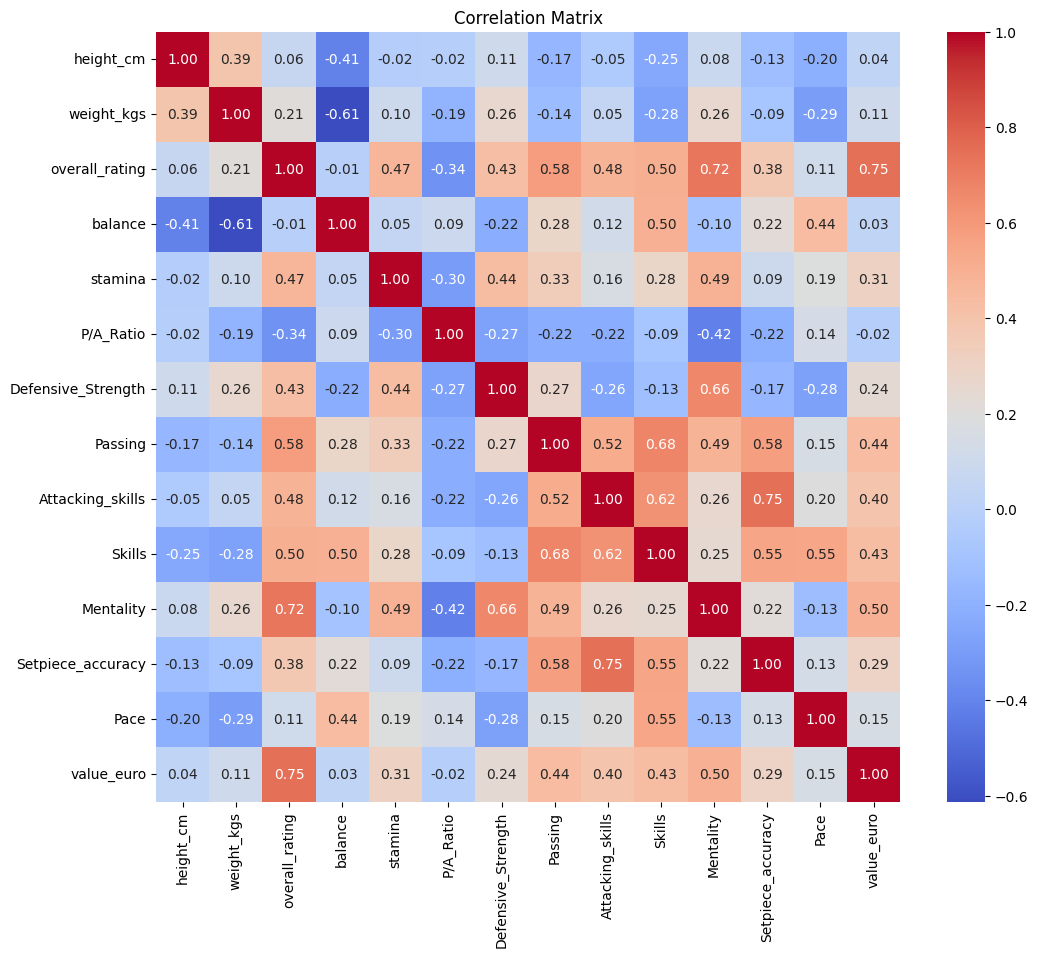

In [ ]:
# Plotting Correlation diagram to explore the relationships between the variables in train data set.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

new_Data = data[['height_cm', 'weight_kgs', 'overall_rating','balance', 'stamina', 'P/A_Ratio',
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace','value_euro']]

corr_matrix = new_Data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='Density'>

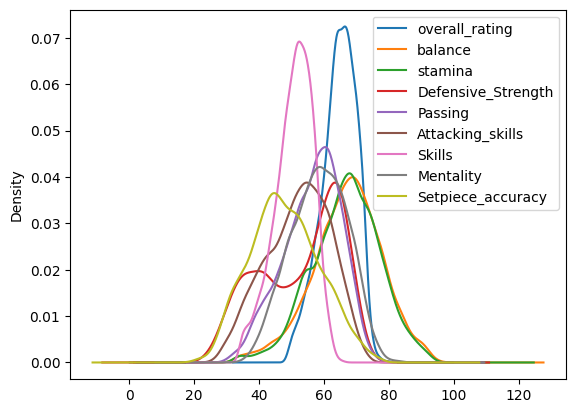

In [76]:
data.iloc[:,[2,5,6,8,9,10,11,12,13]].plot.kde()

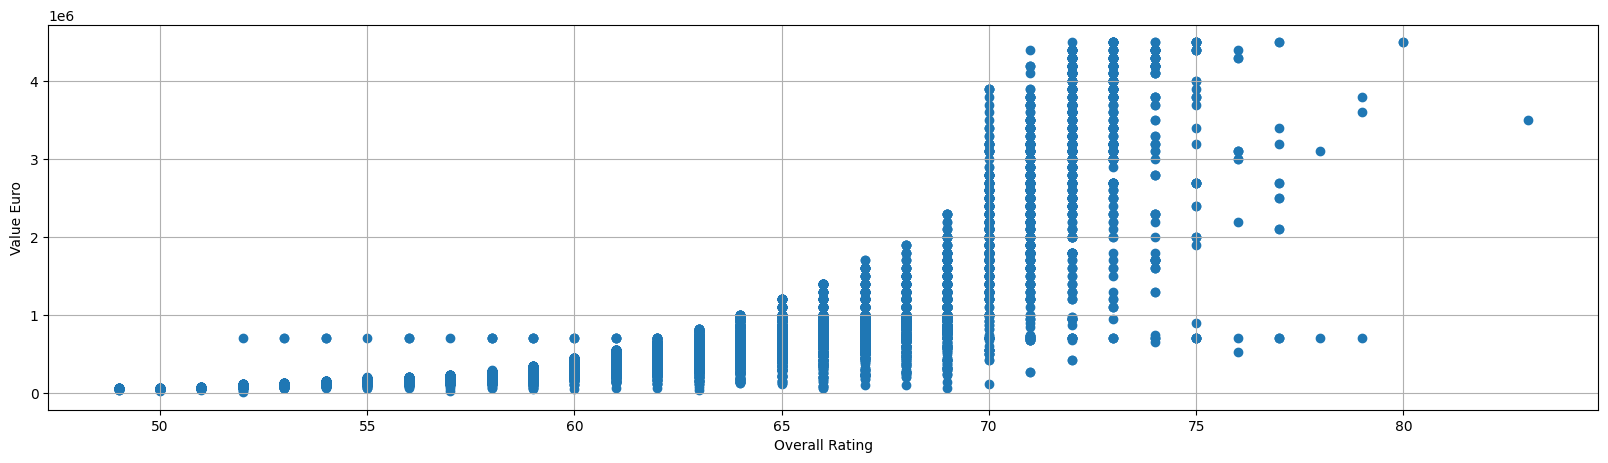

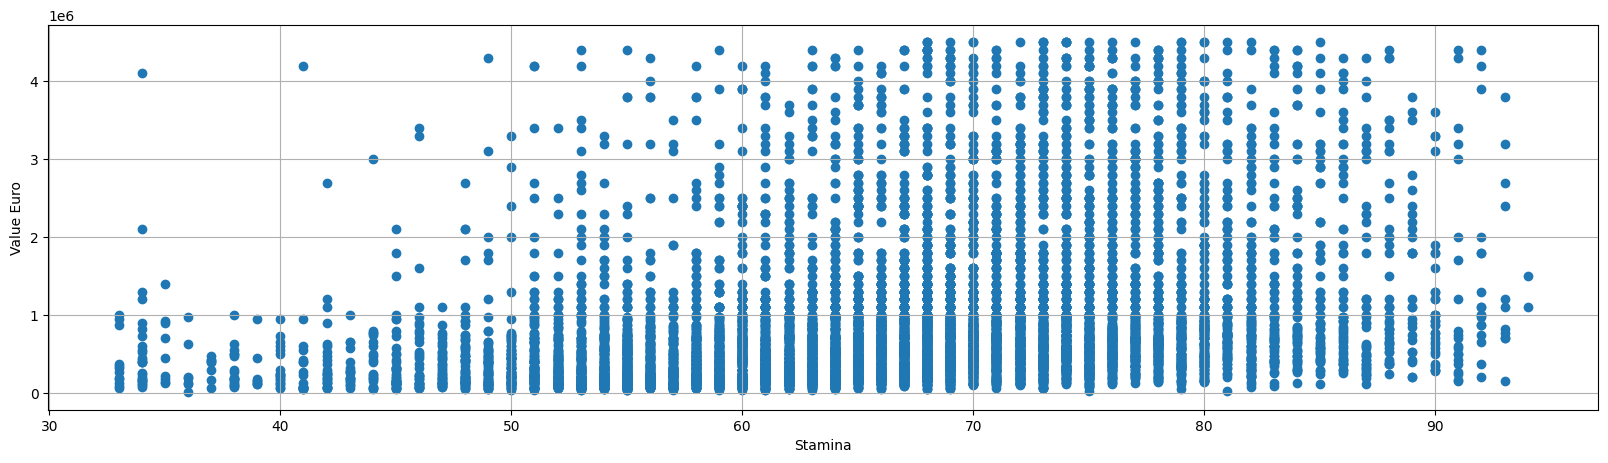

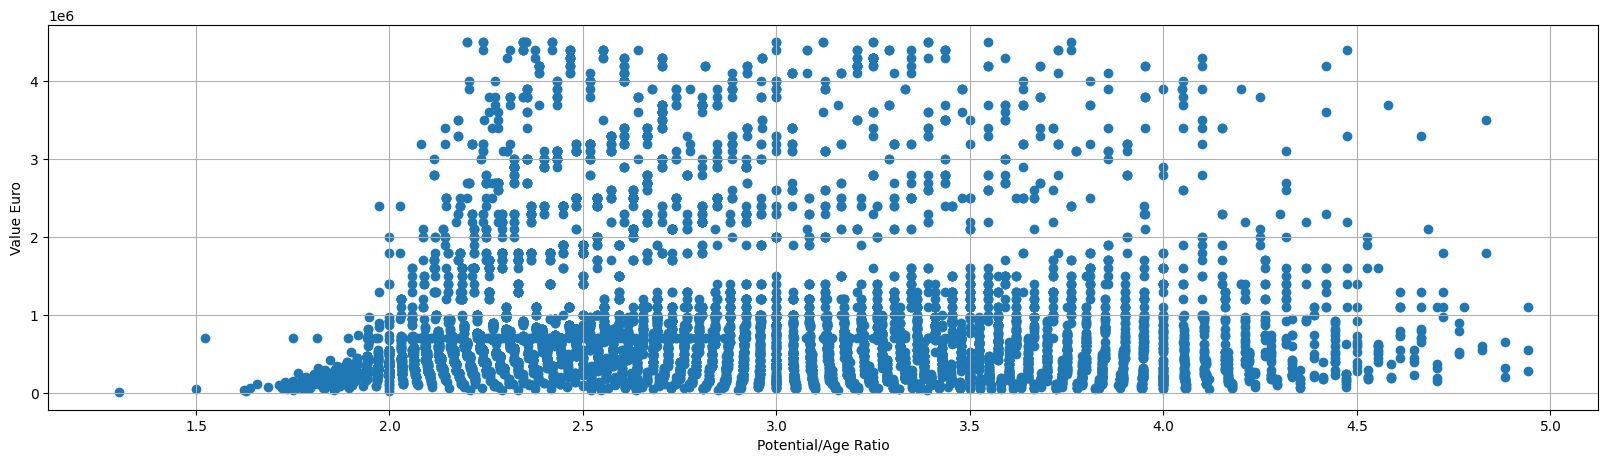

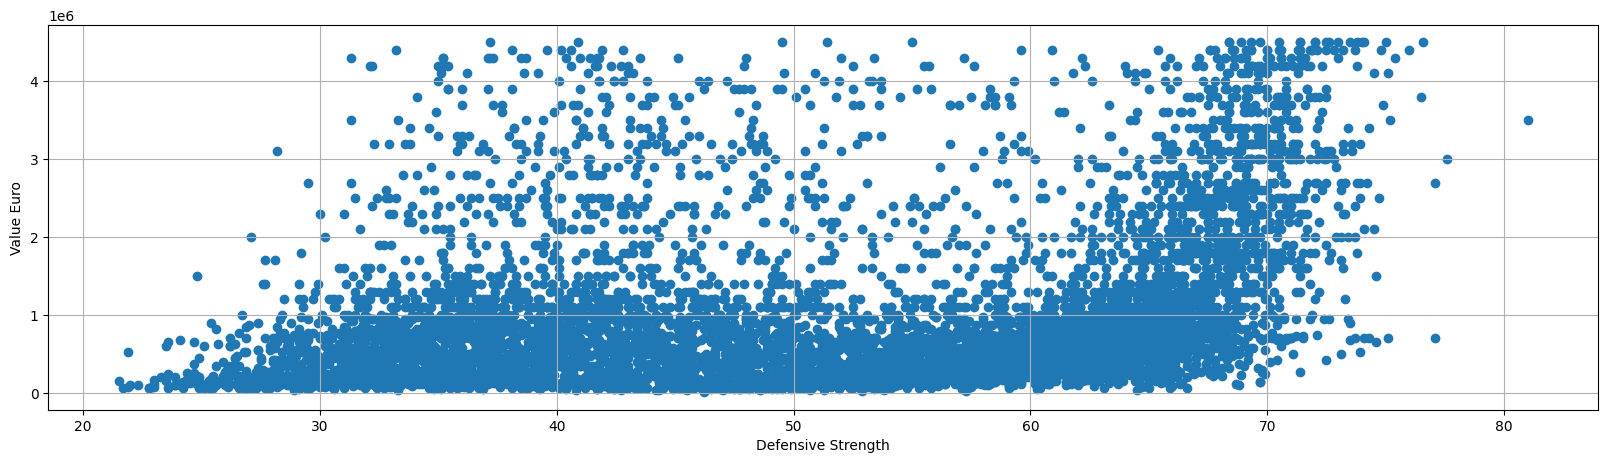

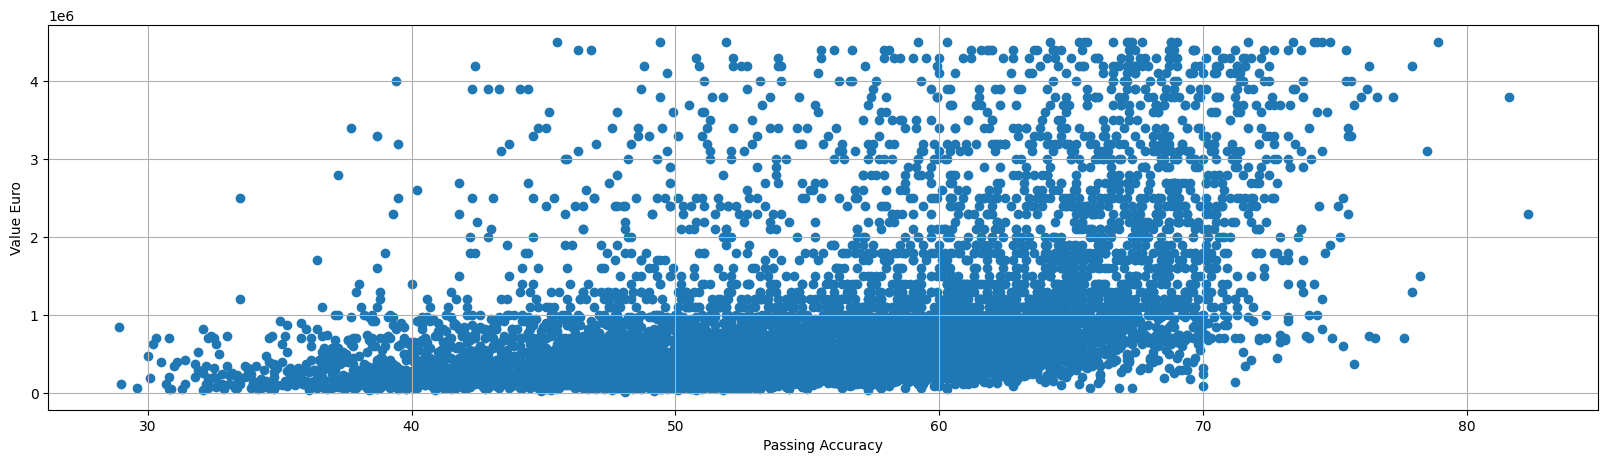

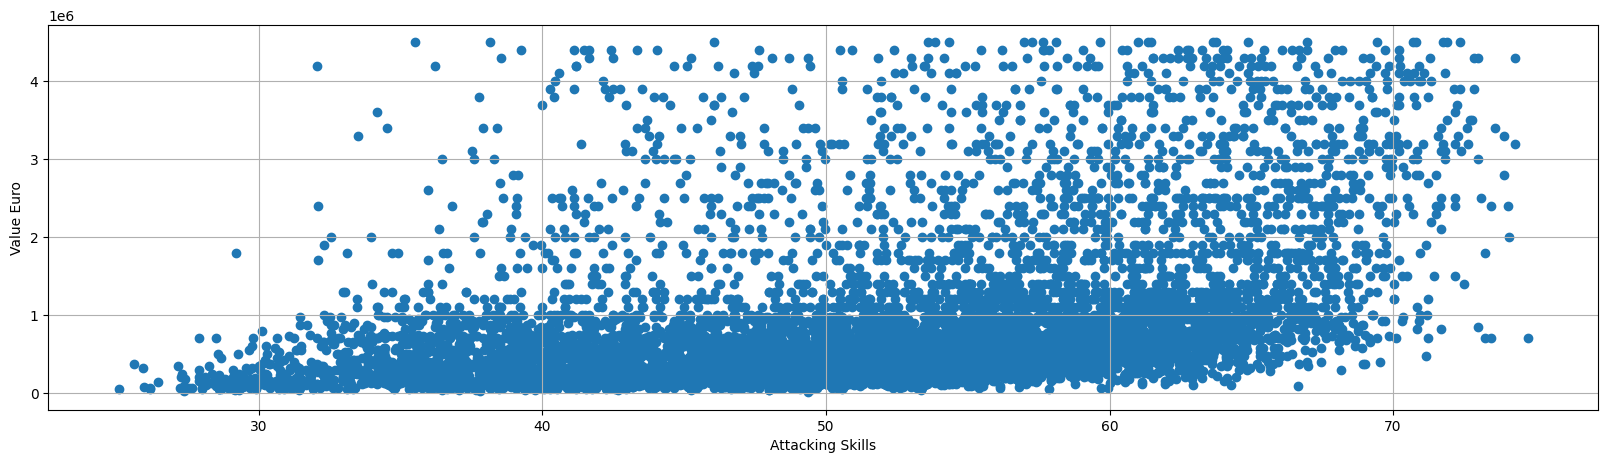

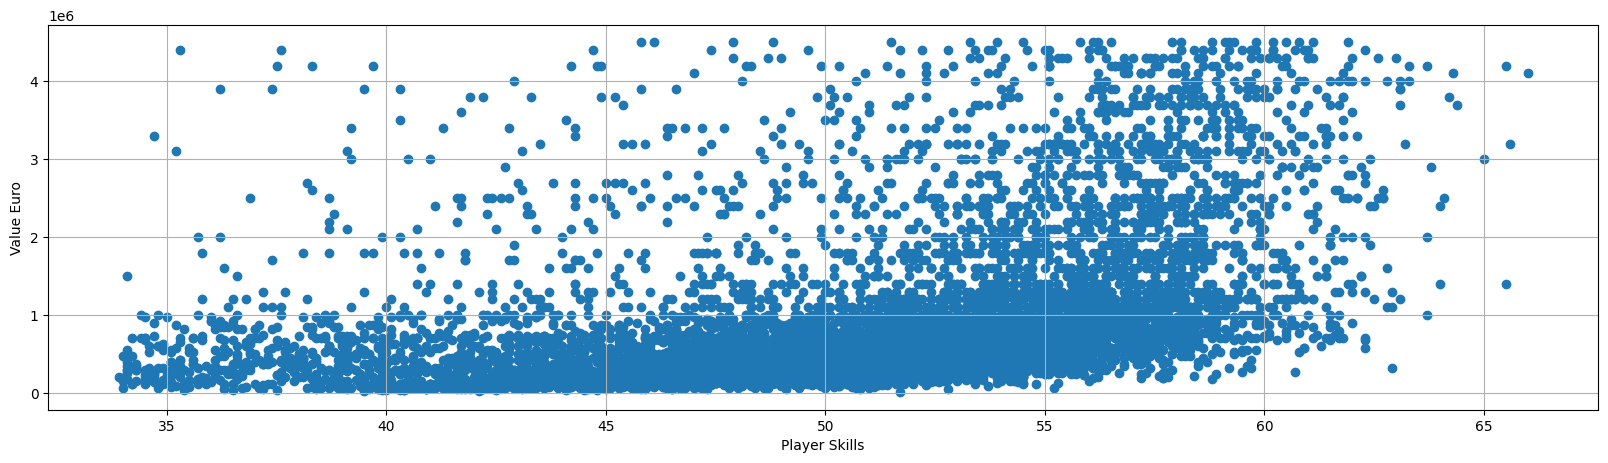

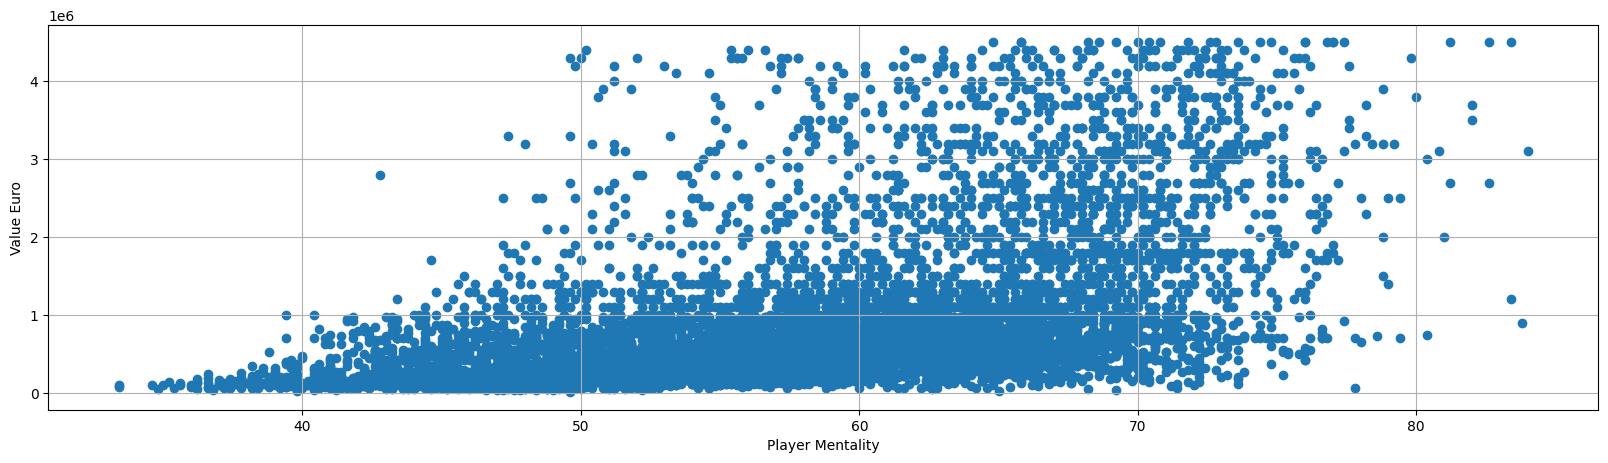

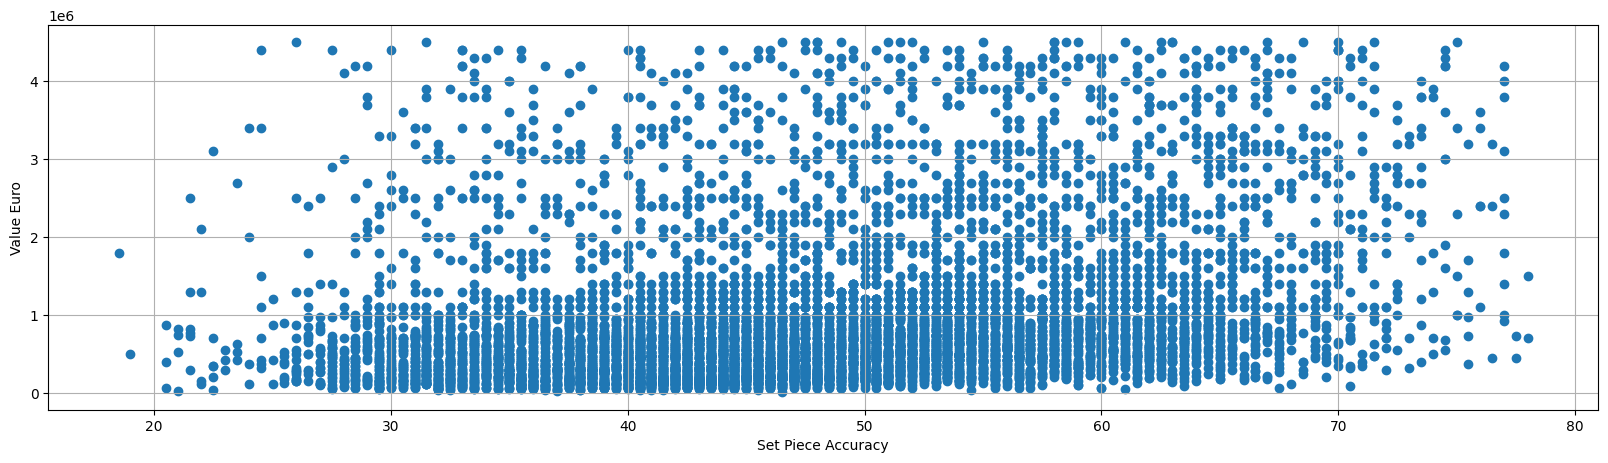

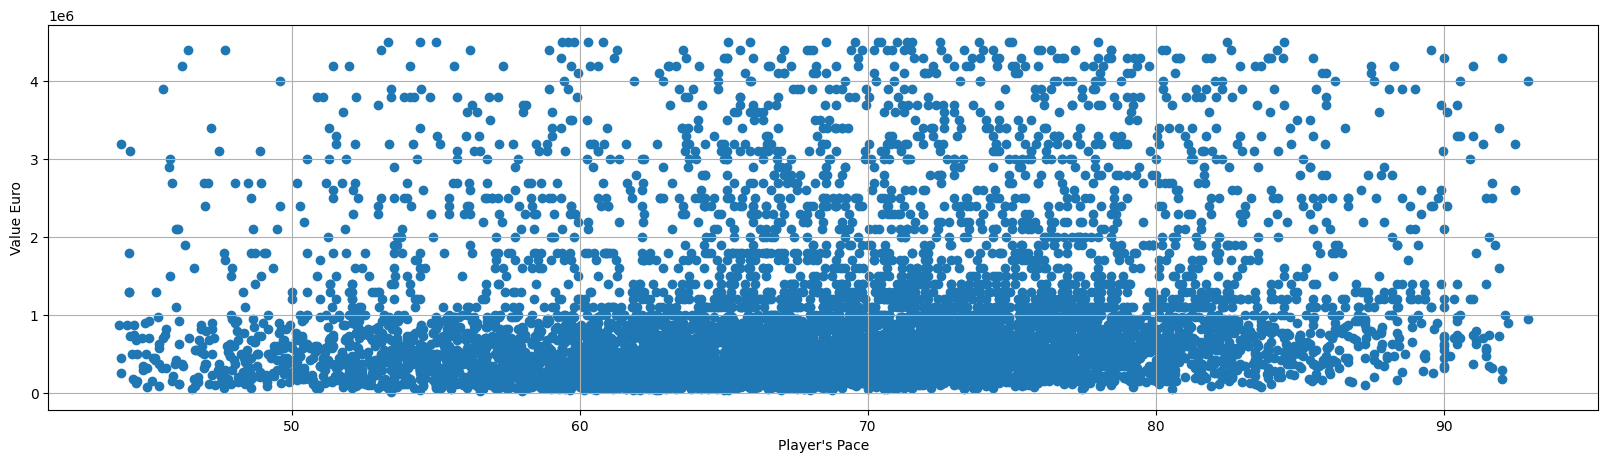

In [77]:
# Knowing relationship b/w the Numeric Variables and the Player's Value.

import matplotlib.pyplot as plt

data_numeric = data[['overall_rating', 'stamina', 'P/A_Ratio',
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace']]

labels = {"overall_rating":"Overall Rating","stamina":"Stamina","P/A_Ratio":"Potential/Age Ratio",
          "Defensive_Strength":"Defensive Strength","Passing":"Passing Accuracy",
          "Attacking_skills":"Attacking Skills","Mentality":"Player Mentality",
          "Setpiece_accuracy":"Set Piece Accuracy","Pace":"Player's Pace","Skills":"Player Skills",}

for attr in data_numeric.columns:
       plt.figure(figsize=(20,5))
       x_axis = data[attr]
       y_axis = data["value_euro"]
       plt.xlabel(labels[attr])
       plt.ylabel("Value Euro")
       plt.grid(True)
       plt.scatter(x_axis,y_axis)
       plt.show()

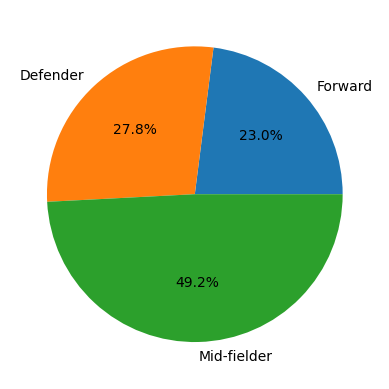

In [78]:
# Plotting Pie Chart to show the distribution of Players.

import matplotlib.pyplot as plt

players = [data["positions_Forward"].sum(),data["positions_Defender"].sum(),data["positions_Midfielder"].sum()]
labels = ["Forward","Defender","Mid-fielder"]

plt.pie(players,labels = labels,autopct='%1.1f%%')
plt.show() 

<Axes: >

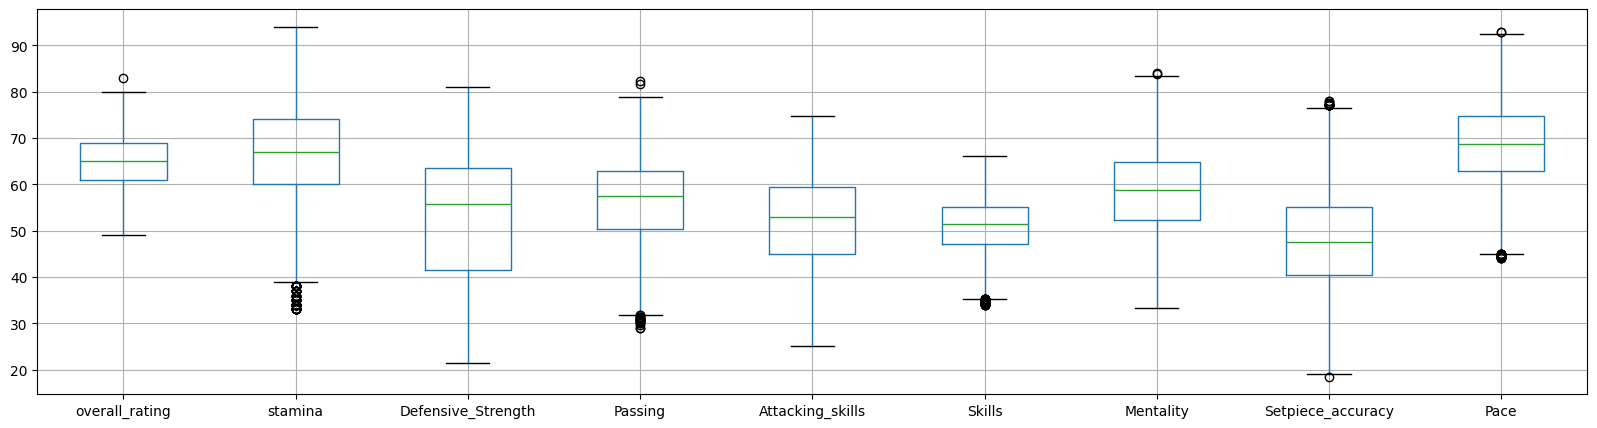

In [79]:
# Plotting the Boxplot for the dataset.

data_numeric = data[['overall_rating', 'stamina', 
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace']]

data_numeric.boxplot(figsize=(20,5))

The box plot shows the distribution of player ratings across different attributes. It can be observed that:

Pace and Stamina have the highest median ratings, indicating that players generally have higher ratings in these attributes.
Skills and Attacking Skills have lower median ratings compared to other attributes.
The interquartile ranges are relatively similar across all attributes, suggesting a consistent spread of ratings within each attribute.
There are some outliers present in several attributes, indicating players with exceptionally high or low ratings in those areas.

Overall, the box plot provides a visual representation of the player rating distribution and can be used to identify trends and insights about player attributes. For example, it suggests that while players generally have high pace and stamina, there is a greater variance in skills and attacking skills ratings.

<Axes: >

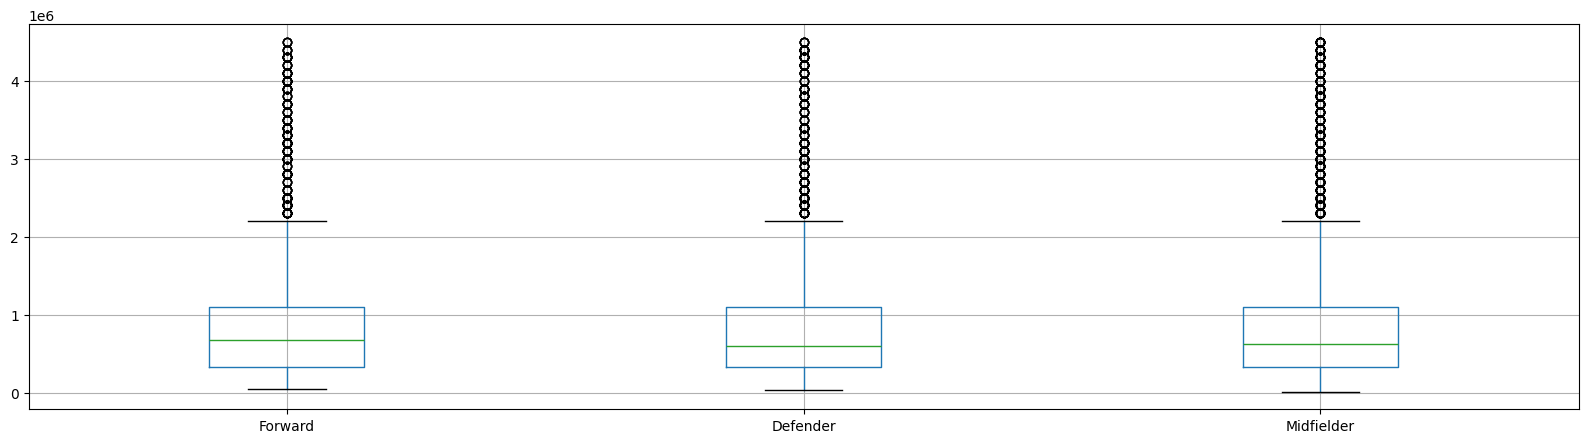

In [80]:
# Plotting a Boxplot to know the Value of Player based on their position.

forward_data = data[data['positions_Forward'] == 1]
defender_data = data[data['positions_Defender'] == 1]
midfielder_data = data[data['positions_Midfielder'] == 1]

position_data = pd.DataFrame({'Forward': forward_data['value_euro'],
                              'Defender': defender_data['value_euro'],
                              'Midfielder': midfielder_data['value_euro']})

position_data.boxplot(grid=True,figsize=(20,5))

The box plot shows that the market value of defenders is higher than that of forwards and midfielders. The median market value of defenders is around 1 million, while the median market value of forwards and midfielders is around 0.7 million. The box plot also shows that there are a lot of outliers for all three positions, indicating that there are some players with very high market values. Overall, the box plot suggests that defenders are more valuable in the market than forwards and midfielders.

<Axes: >

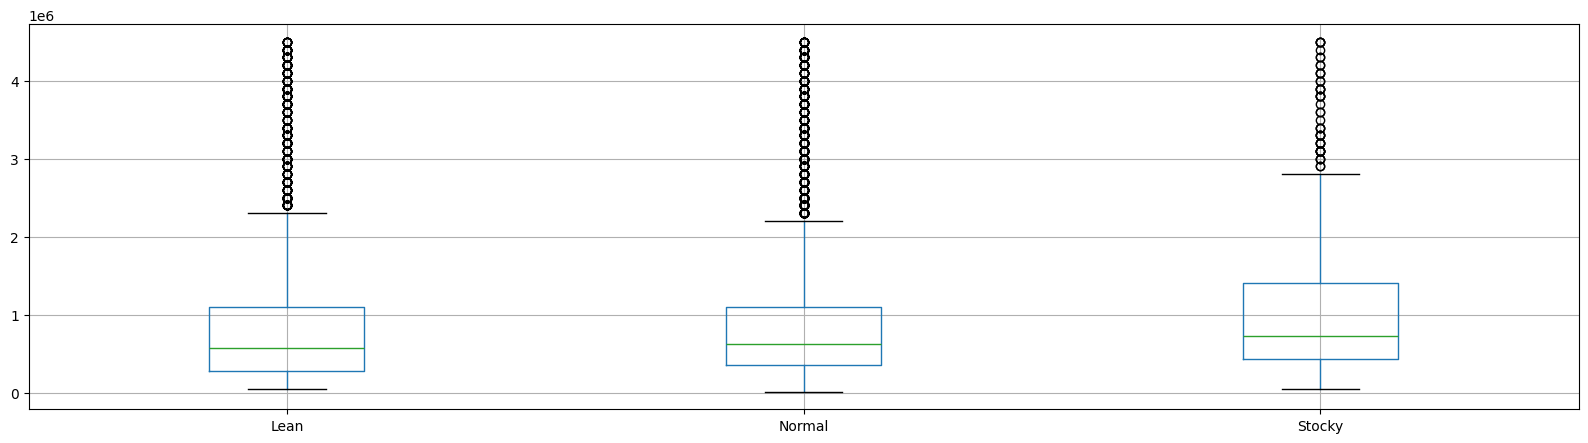

In [81]:
# Plotting a Boxplot to know the Value of Player based on their Body Type.

lean_data = data[data['body_type_Lean'] == 1]
stocky_data = data[data['body_type_Stocky'] == 1]
normal_data = data[data['body_type_Normal'] == 1]

bodyType_data = pd.DataFrame({'Lean': lean_data['value_euro'],
                              'Normal': normal_data['value_euro'],
                              'Stocky': stocky_data['value_euro']})

bodyType_data.boxplot(grid=True,figsize=(20,5))

The boxplot shows that the median value of the "Normal" group is higher than the median value of the "Lean" group. However, there is a lot of overlap in the two groups, so we can't say for sure that there is a significant difference between the two. The "Stocky" group has the highest median value, but also has the largest range and the most outliers. This suggests that the "Stocky" group is the most variable.

Overall, the boxplot suggests that there is some variation in the value of the euro across the three groups. However, the differences between the groups are not large enough to say for sure that they are significantly different.

<Axes: >

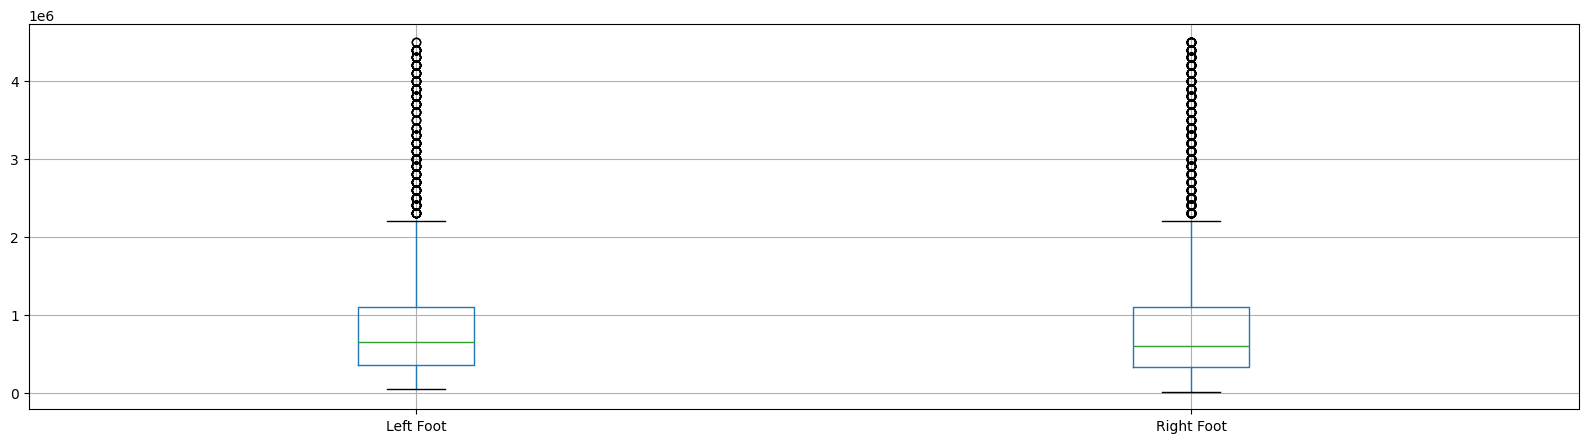

In [82]:
# Plotting a Boxplot to know the Value of Player based on their Preferred foot.

left_data = data[data['preferred_foot_Left'] == 1]
right_data = data[data['preferred_foot_Right'] == 1]

foot_data = pd.DataFrame({'Left Foot': left_data['value_euro'],
                              'Right Foot': right_data['value_euro']})

foot_data.boxplot(grid=True,figsize=(20,5))

The box plot shows the distribution of values for "Left Foot" and "Right Foot". The median value for "Right Foot" is higher than the median value for "Left Foot". The box plot also shows that the range of values for "Right Foot" is wider than the range of values for "Left Foot".

In conclusion, the box plot suggests that the "Right Foot" values are generally higher than the "Left Foot" values and have a wider range. It's important to note that without knowing the context of these values, it's impossible to definitively conclude what this means in terms of Euros.

## Model Building

In [83]:
label = data.pop('value_euro')
data.drop(["height_cm","weight_kgs"],axis = 1,inplace = True)

In [84]:
# Splitting the dataset. (80:10:10)

from sklearn.model_selection import train_test_split

# First, split the data into Training + Validation and Test sets.
X_train_val, X_test, y_train_val, y_test = train_test_split(data, label, test_size=0.1, random_state=42)

# Next, split the Training + Validation set into separate Training and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)


Linear Regression Model (Dummy)

In [85]:
# Performing Linear Regression using Pipeline with Feature Scaling.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score 

lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])

# Fitting the training data to the Pipeline.
lin_reg_pipeline.fit(X_train_val, y_train_val)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [86]:

# Make predictions on the Training set (including Validation set).
y_pred_train = lin_reg_pipeline.predict(X_train_val)

# Evaluating the evaluation metrics on Training Data.
mse = mean_squared_error(y_train_val, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_val, y_pred_train)
r2 = r2_score(y_train_val, y_pred_train)
mape = mean_absolute_percentage_error(y_train_val, y_pred_train)

# Display the metrics value.
print(f"The MSE on Training data: {mse:.2f}")
print(f"The  RMSE on Training data: {rmse:.2f}")
print(f"The   MAE on Training data: {mae:.2f}")
print(f"The  R2 score on Training data: {r2:.2f}")
print(f"The MAPE on Training data : {mape:.2f}")


The MSE on Training data: 343767095538.83
The  RMSE on Training data: 586316.55
The   MAE on Training data: 433097.20
The  R2 score on Training data: 0.63
The MAPE on Training data : 1.17


In [87]:
# Make predictions on the Test set.
y_pred = lin_reg_pipeline.predict(X_test)

# Evaluating the evaluation metrics on Test Data.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the metrics value.
print(f"The MSE on Test data: {mse:.2f}")
print(f"The  RMSE on Test data: {rmse:.2f}")
print(f"The MAE on Test data: {mae:.2f}")
print(f"The R2 Score on Test data: {r2:.2f}")
print(f"The MAPE on Test data : {mape:.2f}")


The MSE on Test data: 351287360627.42
The  RMSE on Test data: 592695.00
The MAE on Test data: 431948.97
The R2 Score on Test data: 0.63
The MAPE on Test data : 1.14


1. Ridge Regression with HyperParameter Tuning (HPT)

Ridge regression is a valuable tool for enhancing linear regression models, particularly when dealing with multicollinearity, high-dimensional data, or overfitting. By incorporating a regularization penalty, it stabilizes coefficient estimates, improves predictive performance, and helps manage the bias-variance trade-off. This makes ridge regression a robust choice for achieving more reliable and generalizable results in various modeling contexts.

Pseudocode 

## Step 1: Import Necessary Libraries
Import necessary libraries:
    - PolynomialFeatures for generating polynomial features
    - StandardScaler for feature scaling
    - ShuffleSplit for creating cross-validation splits
    - RandomizedSearchCV for hyperparameter tuning (if needed)
    - RidgeCV for Ridge regression with cross-validation
    - mean_absolute_error for evaluation

## Step 2: Define Cross-Validation Strategy
Initialize cross-validation strategy:
    - Use ShuffleSplit to create 10 splits (n_splits=10)
    - Set test size to 10% (test_size=0.1)
    - Use a random seed for reproducibility (random_state=42)

## Step 3: Set Up Hyperparameter Tuning
Define the list of alpha (regularization parameter) values to test:
    - Use a logarithmic scale of values between 10^-4 and 10^0 (alpha_list)

## Step 4: Create a Pipeline for Polynomial Regression with Ridge Regularization
Set up a pipeline with the following steps:
    - Step 4.1: Generate polynomial features of degree 3 ("poly")
    - Step 4.2: Apply feature scaling to standardize the features ("feature_scaling")
    - Step 4.3: Perform Ridge regression with cross-validation ("ridge_cv")
        - Pass the list of alpha values to RidgeCV
        - Use the defined cross-validation strategy (cv)
        - Optimize the model based on the negative mean absolute error

## Step 5: Fit the Model to the Training Data
Fit the pipeline to the training data (X_train_val, y_train_val):
    - Automatically perform polynomial feature transformation, scaling, and model fitting
    - The pipeline selects the best alpha value based on cross-validation results

## Step 6: Store the Results
Store the cross-validation results and fitted model (ridge_reg_cv_results1).

In [88]:
# Performing Ridge Regression using Pipeline with Feature Scaling and Hyperparameter Tuning.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score 

# 10-Fold Validation split for Hyperparameter Tuning.
cv = ShuffleSplit(n_splits = 10, test_size = 0.1, random_state = 42)


# Polynomial Regression with Ridge Regularization
# Hyperparameter Tuning (Regularization Parameter)
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=3)),
                              ("feature_scaling", StandardScaler()),
                             ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                   cv=cv,
                                                   scoring="neg_mean_absolute_error"))])

ridge_reg_cv_results1 = ridge_reg_pipeline.fit(X_train_val, y_train_val)

In [89]:
# Make predictions on the Training set (including Validation set).
y_pred_train = ridge_reg_cv_results1.predict(X_train_val)

# Evaluating the evaluation metrics on Training Data.
mse = mean_squared_error(y_train_val, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_val, y_pred_train)
r2 = r2_score(y_train_val, y_pred_train)
mape = mean_absolute_percentage_error(y_train_val, y_pred_train)

# Display the metrics value.
print(f"The MSE on Training data: {mse:.2f}")
print(f"The  RMSE on Training data: {rmse:.2f}")
print(f"The   MAE on Training data: {mae:.2f}")
print(f"The  R2 score on Training data: {r2:.2f}")
print(f"The MAPE on Training data : {mape:.2f}")

The MSE on Training data: 95485076149.28
The  RMSE on Training data: 309006.60
The   MAE on Training data: 187336.25
The  R2 score on Training data: 0.90
The MAPE on Training data : 0.36


In [90]:
# Make predictions on the Test set.
y_pred = ridge_reg_cv_results1.predict(X_test)

# Evaluating the evaluation metrics on Test Data.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the metrics value.
print(f"The MSE on Test data: {mse:.2f}")
print(f"The  RMSE on Test data: {rmse:.2f}")
print(f"The MAE on Test data: {mae:.2f}")
print(f"The R2 Score on Test data: {r2:.2f}")
print(f"The MAPE on Test data : {mape:.2f}")

The MSE on Test data: 132174924490.85
The  RMSE on Test data: 363558.69
The MAE on Test data: 223999.16
The R2 Score on Test data: 0.86
The MAPE on Test data : 0.42


2. Random Forest Regressor with HyperParameter Tuning (HPT)

Random Forest Regression is a powerful and user-friendly tool for regression tasks. It excels at handling complex data, preventing overfitting, and dealing with missing values, all while providing insights into feature importance. Its ease of use and strong performance make it a reliable choice for many predictive modeling problems.

Pseudocode

## Step 1: Import Necessary Libraries
Import necessary libraries:
   - RandomForestRegressor for building the Random Forest model
   - mean_absolute_error for evaluating model performance
   - cross_validate for performing cross-validation
   - ShuffleSplit for creating cross-validation splits
   - RandomizedSearchCV for hyperparameter tuning
 
## Step 2: Define Cross-Validation Strategy
Initialize the cross-validation strategy:
   - Use ShuffleSplit to create 10 splits (n_splits=10)
   - Set test size to 10% (test_size=0.1)
   - Use a random seed for reproducibility (random_state=42)
 
## Step 3: Define Hyperparameter Search Space
Define the hyperparameter search space (`param_distributions`):
   - "n_estimators": Number of trees in the forest (e.g., [ 20, 50, 100, 200])
   - "max_leaf_nodes": Maximum number of leaf nodes in each tree (e.g., [ 10, 20, 50, 100])
   - "min_samples_split": Minimum number of samples required to split an internal node (e.g., [2, 6, 8, 10])
   - "min_samples_leaf": Minimum number of samples required to be at a leaf node (e.g., [1, 2, 4])
 
## Step 4: Set Up Randomized Search with Cross-Validation
Initialize `RandomizedSearchCV` with the following parameters:
   - Model: RandomForestRegressor with parallel processing (`n_jobs=2`)
   - Hyperparameter search space: Use the defined `param_distributions`
   - Cross-validation strategy: Use the previously defined `cv`
   - Scoring metric: Use negative mean absolute error (`neg_mean_absolute_error`) as the evaluation metric
 
## Step 5: Fit the Model to the Training Data
Fit the `RandomizedSearchCV` model to the training data (`X_train_val`, `y_train_val`):
   - Randomly search the hyperparameter space to find the best combination of parameters.
   - Perform cross-validation to evaluate each set of hyperparameters.
 
## Step 6: Retrieve Best Hyperparameters
After the model has been fitted, retrieve the best hyperparameters found during the search:
   - Access the `best_params_` attribute to obtain the optimal hyperparameter values.

## Step 7: Fit the Model to the Training Data
Fit the pipeline to the training data (X_train_val, y_train_val)

## Step 8: Store the Results
Store the cross-validation results and fitted model (rf_reg_pipeline).
 

In [91]:
# Performing RandomForest Regression using Pipeline with Feature Scaling and Hyperparameter Tuning.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score 

# 10-Fold Validation split for Hyperparameter Tuning.
cv = ShuffleSplit(n_splits = 10, test_size = 0.1, random_state = 42)

# Defining the HyperParameter Grid.
param_distributions = {
    "n_estimators": [ 20, 50, 100, 200],
    "max_leaf_nodes": [10, 20, 50, 100],
    "min_samples_split": [2,6,8,10],
    "min_samples_leaf": [1,2,4]
}

# Performing Random Search on the HyperParameter Combinations to find the most optimal combination.
search_cv = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=2), param_distributions=param_distributions,
    cv = cv, scoring="neg_mean_absolute_error")

search_cv.fit(X_train_val, y_train_val)

# Printing the best HyperParameter Combination.
params = search_cv.best_params_

In [92]:
# Performing RandomForest Regression using the most optimal HyperParameter Combination.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

rf_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=3)),
                              ("feature_scaling", StandardScaler()),
                              ("rf_reg", RandomForestRegressor(n_estimators = params["n_estimators"], max_leaf_nodes = params["max_leaf_nodes"],min_samples_leaf = params["min_samples_leaf"],min_samples_split = params["min_samples_split"], n_jobs = 2))])

rf_reg_pipeline.fit(X_train_val, y_train_val)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('feature_scaling', StandardScaler()),
                ('rf_reg',
                 RandomForestRegressor(max_leaf_nodes=100, min_samples_leaf=4,
                                       min_samples_split=6, n_jobs=2))])

In [93]:
# Make predictions on the Training set (including Validation set).
y_pred_train = rf_reg_pipeline.predict(X_train_val)

# Evaluating the evaluation metrics on Training Data.
mse = mean_squared_error(y_train_val, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_val, y_pred_train)
r2 = r2_score(y_train_val, y_pred_train)
mape = mean_absolute_percentage_error(y_train_val, y_pred_train)

# Display the metrics value.
print(f"The MSE on Training data: {mse:.2f}")
print(f"The  RMSE on Training data: {rmse:.2f}")
print(f"The   MAE on Training data: {mae:.2f}")
print(f"The  R2 score on Training data: {r2:.2f}")
print(f"The MAPE on Training data : {mape:.2f}")

The MSE on Training data: 22181754577.33
The  RMSE on Training data: 148935.40
The   MAE on Training data: 78043.86
The  R2 score on Training data: 0.98
The MAPE on Training data : 0.14


In [95]:
# Make predictions on the Test set.
y_pred = rf_reg_pipeline.predict(X_test)

# Evaluating the evaluation metrics on Test Data.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the metrics value.
print(f"The MSE on Test data: {mse:.2f}")
print(f"The  RMSE on Test data: {rmse:.2f}")
print(f"The MAE on Test data: {mae:.2f}")
print(f"The R2 Score on Test data: {r2:.2f}")
print(f"The MAPE on Test data : {mape:.2f}")

The MSE on Test data: 51022433525.31
The  RMSE on Test data: 225881.46
The MAE on Test data: 97453.55
The R2 Score on Test data: 0.95
The MAPE on Test data : 0.15


3. XGBoost Regressor (Extreme Gradient Boosting) with HyperParameter Tuning (HPT)

XGBoost Regression is a powerful and versatile tool that excels in delivering high performance and accuracy. It effectively handles complex data, prevents overfitting, and provides valuable insights into feature importance. Its robustness, flexibility, and scalability, along with strong community support, make it a top choice for many regression tasks.

Pseudocode

## Step 1: Import Necessary Libraries
Import necessary libraries:
    - Pipeline for creating a sequence of data processing steps
    - StandardScaler for feature scaling
    - GridSearchCV for hyperparameter tuning with grid search
    - xgboost as xgb for the XGBoost regressor
    - mean_squared_error for evaluating the model's performance

## Step 2: Define the Pipeline
Create a pipeline with the following steps:
    - Step 2.1: Scale the features using StandardScaler ("scaler")
    - Step 2.2: Apply the XGBoost regressor ("xgb")
        - Use `reg:squarederror` as the objective function for regression.

## Step 3: Define Hyperparameter Grid
Define the hyperparameter grid for tuning the XGBoost regressor:
    - "xgb__max_depth": Maximum depth of each tree (e.g., [3, 5, 7])
    - "xgb__learning_rate": Learning rate (e.g., [0.01, 0.09, 0.1])
    - "xgb__n_estimators": Number of trees in the ensemble (e.g., [50, 100, 200])

## Step 4: Set Up Grid Search with Cross-Validation
Initialize `GridSearchCV` with the following parameters:
    - Pipeline: Use the previously defined pipeline (`pipe`)
    - Hyperparameter grid: Use the defined `param_grid`
    - Cross-validation strategy: Use 5-fold cross-validation (cv=5)
    - Parallel processing: Utilize all available cores for efficiency (n_jobs=-1)

## Step 5: Perform Grid Search
Fit the `GridSearchCV` to the training data (`X_train_val`, `y_train_val`):
    - Perform an exhaustive search over the specified hyperparameter grid.
    - Evaluate each combination of parameters using cross-validation.

## Step 6: Retrieve Best Hyperparameters
After the search, retrieve the best hyperparameters found during the search:
    - Access the `best_params_` attribute to obtain the optimal hyperparameter values.

## Step 7: Train the Best Model on the Entire Training Set
Use the best model identified by `GridSearchCV` to fit the entire training dataset:
    - Access the best estimator using the `best_estimator_` attribute.
    - Fit this best model to `X_train_val` and `y_train_val`.

## Step 8: Evaluate the Model on the Test Set
Make predictions on the test set (`X_test`) using the trained best model:
    - Use the `predict` method of the best model to generate predictions (`y_pred`).
    - Calculate the mean squared error (MSE) between the actual (`y_test`) and predicted values (`y_pred`).
    - Print the MSE as a measure of model performance.


In [96]:
# Performing XGBoost Regression using Pipeline with and Hyperparameter Tuning.

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score 


# Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.09,0.1,],
    'n_estimators': [50, 100,200]
}

grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

print(f'Best parameters: {grid_search.best_params_}')

# Training the model on the most optimal HyperParameter Combination.
best_xgb_model = xgb.XGBRegressor(**grid_search.best_params_)

best_xgb_model.fit(X_train_val, y_train_val)

Best parameters: {'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 100}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
# Make predictions on the Training set (including Validation set).
y_pred_train = best_xgb_model.predict(X_train_val)

# Evaluating the evaluation metrics on Training Data.
mse = mean_squared_error(y_train_val, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_val, y_pred_train)
r2 = r2_score(y_train_val, y_pred_train)
mape = mean_absolute_percentage_error(y_train_val, y_pred_train)

# Display the metrics value.
print(f"The MSE on Training data: {mse:.2f}")
print(f"The  RMSE on Training data: {rmse:.2f}")
print(f"The   MAE on Training data: {mae:.2f}")
print(f"The  R2 score on Training data: {r2:.2f}")
print(f"The MAPE on Training data : {mape:.2f}")

The MSE on Training data: 13407717305.46
The  RMSE on Training data: 115791.70
The   MAE on Training data: 56577.70
The  R2 score on Training data: 0.99
The MAPE on Training data : 0.09


In [98]:
# Make predictions on the Test set.
y_pred = best_xgb_model.predict(X_test)

# Evaluating the evaluation metrics on Test Data.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the metrics value.
print(f"The MSE on Test data: {mse:.2f}")
print(f"The  RMSE on Test data: {rmse:.2f}")
print(f"The MAE on Test data: {mae:.2f}")
print(f"The R2 Score on Test data: {r2:.2f}")
print(f"The MAPE on Test data : {mape:.2f}")

The MSE on Test data: 45750220142.02
The  RMSE on Test data: 213893.01
The MAE on Test data: 77320.16
The R2 Score on Test data: 0.95
The MAPE on Test data : 0.10
